<img src="./images/DLI_Header.png" style="width: 400px;">

<!-- # Assessment -->
# 評価試験

<!--
Congratulations on going through today's course! Hopefully you've learned some valuable skills along the way. Now it's time to put those skills to the test. In this assessment you will train a new model that is able to recognize fresh and rotten fruit. You will need to get the model to a validation accuracy of 92% in order to pass the assessment, though we challenge you to do even better if you can. You will have the use the skills that you learned in the previous exercises. Specifically we suggest you use some combination of transfer learning, data augmentation, and fine tuning. Once you have trained the model to be at least 92% accurate on the test dataset, you will save your model, and then assess its accuracy. Let's get started! 
-->
全ての演習を完了した皆様、おめでとうございます。ここまででいくつもの貴重なスキルを学んできたことと思います。次はそれらのスキルをテストする番です。この評価試験では、新鮮な果物と腐った果物を認識できる新しいモデルをトレーニングします。合格の基準はモデルの検証精度 92% を達成することですが、可能であればさらなる改善に挑戦してください。これまでの演習で学んだスキルを使用してください。具体的には、転移学習、データ拡張、ファインチューニングの組み合わせを使うことをお勧めします。テストデータセットで少なくとも 92% の精度になるようにモデルを訓練したら、モデルを保存して、その精度を評価します。さあ、始めましょう


<!--
## The Dataset
-->
## データセット

<!--
In this exercise, you will train a model to recognize fresh and rotten fruits. The dataset comes from [Kaggle](https://www.kaggle.com/sriramr/fruits-fresh-and-rotten-for-classification), a great place to go if you're interested in starting a project after this class. If you'd like, you can look at the dataset structure in the `fruits` folder. There are 6 categories of fruits: fresh apples, fresh oranges, fresh bananas, rotten apples, rotten oranges, and rotten bananas. This will mean that your model will require an output layer of 6 neurons to do the categorization successfully. You'll also need to compile the model with `categorical_crossentropy`, as we have more than two categories.
-->
この演習では、新鮮な果物と腐った果物を認識するモデルを訓練します。データセットは、このワークショップの後に実際のプロジェクトを始めたいと思っている人に最適な場所である[Kaggle](https://www.kaggle.com/sriramr/fruits-fresh-and-rotten-for-classification)から入手したものです。`fruits`フォルダ内のデータセットの構造を見ることもできます。果物には 6 つのカテゴリがあります: 新鮮なリンゴ、新鮮なオレンジ、新鮮なバナナ、腐ったリンゴ、腐ったオレンジ、腐ったバナナです。これは、あなたのモデルがうまく分類を行うためには、出力層に 6 つのニューロンが必要であることを意味します。また、2 つ以上のカテゴリがあるので、`categorical_crossentropy` でモデルをコンパイルする必要があります。

<img src="./images/fruits.png" style="width: 600px;">

<!--
## Load ImageNet Base Model
-->
## ImageNet ベースモデルの読み込み

<!--
We encourage you to start with a model pretrained on ImageNet. You'll need to load the model with the correct weights, set an input shape, and choose to remove the last layers of the model. Remember that images have three dimensions: a height, and width, and a number of channels. Because these pictures are in color, there will be three channels for red, green, and blue. We've filled in the input shape for you. This cannot be changed or the assessment will fail. If you need a reference for setting up the pretrained model, please take a look at notebook 05b where you first implemented transfer learning.
-->
ImageNet データセットで事前にトレーニングされたモデルから始めることをお勧めします。下記のコードの FIXME を適切に置き換えてください。モデルを正しい重みでロードし、入力次元数を設定し、モデルの最後の層を削除する必要があります。画像には高さ、幅、チャンネル数の 3 つの次元があることをお忘れなく。これらの画像はカラーなので、赤、緑、青の3つのチャンネルがあります。入力次元数は記入済みで、これを変更してしまうと課題をクリアできないでしょう。事前学習モデルの設定の参考が必要な方は、最初に転移学習を演習したノートブック 05b をご覧ください。


In [1]:
from tensorflow import keras

base_model = keras.applications.VGG16(
    weights='imagenet',
    input_shape=(224, 224, 3),
    include_top=False)

<!--
## Freeze Base Model
-->
## ベースモデルの凍結

<!--
Next, we suggest you freeze the base model, as you did in notebook 05b. This is done so that all the learning from the ImageNet dataset does not get destroyed in the initial training.
-->
次に、ノートブック 05b で行ったように、ベースモデルを凍結することをお勧めします。これは、最初のトレーニングで ImageNet データセットからのすべての学習が破壊されないようにするためです。

In [2]:
# Freeze base model
base_model.trainable = False

<!--
## Add Layers to Model
-->
## モデルにレイヤーを追加

<!--
Now it's time to add layers to your pretrained model. You can again use notebook 05b as a guide. Pay close attention to the last dense layer and make sure it has the correct number of neurons to classify the different types of fruit.
-->
では、事前学習したモデルにレイヤーを追加しましょう。ノートブック 05b を参考にしながら、最後の全結合層 (Dense) が果物を正しく分類できるように、ニューロンの数を注意深く設定してください。


In [3]:
# Create inputs with correct shape
inputs = keras.Input(shape=(224, 224, 3))

x = base_model(inputs, training=False)

# Add pooling layer or flatten layer
x = keras.layers.GlobalAveragePooling2D()(x)

# Add final dense layer
outputs = keras.layers.Dense(6, activation = 'softmax')(x)

# Combine inputs and outputs to create model
model = keras.Model(inputs, outputs)

In [4]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 6)                 3078      
Total params: 14,717,766
Trainable params: 3,078
Non-trainable params: 14,714,688
_________________________________________________________________


<!--
## Compile Model
-->
## モデルのコンパイル

<!--
Now it's time to compile the model with loss and metrics options. Remember that we're training on a number of different categories, rather than a binary classification problem.
-->
次に、loss と metrics のオプションを付けてモデルをコンパイルしましょう。二値分類ではなく、多くの異なるカテゴリでトレーニングしていることをお忘れなく。


In [7]:
model.compile(loss = keras.losses.CategoricalCrossentropy(from_logits=True) , metrics = [keras.metrics.categorical_accuracy])

<!--
## Augment the Data
-->
## データの拡張

<!--
If you'd like, try to augment the data to improve the dataset. Feel free to look at notebook 04a and notebook 05b for augmentation examples. You can also look at the documentation for the [Keras ImageDataGenerator class](https://keras.io/api/preprocessing/image/#imagedatagenerator-class). This step is optional, but you may find it helpful to get to 92% accuracy when you train.
-->
もしよろしければ、データセットを改善するためにデータ拡張を試してください。データ拡張の例は、ノートブック 04a と 05b を参照してください。また、[Keras の ImageDataGenerator クラス](https://keras.io/api/preprocessing/image/#imagedatagenerator-class)のドキュメントもご覧ください。このステップは任意ですが、トレーニングで 92% の精度を達成する役に立つかもしれません。


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=True,  # set input mean to 0 over the dataset
        samplewise_center=True,  # set each sample mean to 0
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True # we don't expect Bo to be upside-down so we will not flip vertically
)

<!--
## Load Dataset
-->
## データセットの読み込み

<!--
Now it's time to load the train and test datasets. You'll have to pick the right folders, as well as the right `target_size` of the images (it needs to match the height and width input of the model you've created). If you'd like a reference, you can check out 
notebook 05b.
-->
では、トレーニング データセットとテスト データセットを読み込みましょう。適切なフォルダを選択し、画像の適切なターゲットサイズ (作成したモデルが想定する高さと幅に一致する必要があります) も選択しなければなりません。参考にしたい方は、ノートブック 05b をチェックしてください。

In [12]:
# load and iterate training dataset
train_it = datagen.flow_from_directory("fruits/train/",
                                       target_size=(244, 244), 
                                       color_mode='rgb', 
                                       class_mode="categorical")
# load and iterate test dataset
test_it = datagen.flow_from_directory("fruits/test/",
                                      target_size=(244, 244), 
                                      color_mode='rgb', 
                                      class_mode="categorical")

Found 1182 images belonging to 6 classes.
Found 330 images belonging to 6 classes.


<!--
## Train the Model
-->
## モデルのトレーニング

<!--
Time to train the model! Pass the `train` and `test` iterators into the `fit` function, as well as setting your desired number of epochs.
-->
いよいよモデルをトレーニングする時です。トレーニングとテストのイテレータを `fit` 関数に渡し、希望するエポック数を設定します。


In [13]:
model.fit(train_it,
          validation_data=test_it,
          steps_per_epoch=train_it.samples/train_it.batch_size,
          validation_steps=test_it.samples/test_it.batch_size,
          epochs=20)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/20
37/36 [==============================] - 24s 643ms/step - loss: 1.6536 - categorical_accuracy: 0.3849 - val_loss: 1.5646 - val_categorical_accuracy: 0.4788
Epoch 2/20
37/36 [==============================] - 22s 589ms/step - loss: 1.5556 - categorical_accuracy: 0.4856 - val_loss: 1.5484 - val_categorical_accuracy: 0.4909
Epoch 3/20
37/36 [==============================] - 22s 590ms/step - loss: 1.4809 - categorical_accuracy: 0.5567 - val_loss: 1.3895 - val_categorical_accuracy: 0.6485
Epoch 4/20
37/36 [==============================] - 22s 591ms/step - loss: 1.3415 - categorical_accuracy: 0.7081 - val_loss: 1.2809 - val_categorical_accuracy: 0.7697
Epoch 5/20
37/36 [==============================] - 22s 590ms/step - loss: 1.2677 - categorical_accuracy: 0.7800 - val_loss: 1.2696 - val_categorical_accuracy: 0.7697
Epoch 6/20
37/36 [==============================] - 22s 591ms/step - loss: 1.2506 - categorical_accuracy: 0.7961 - val_loss: 1.2367 - val_categorical_accuracy: 0.821

<!--
## Unfreeze Model for Fine Tuning
-->
## モデルの凍結を解除してファインチューニング

<!--
If you have reached 92% validation accuracy already, this next step is optional. If not, we suggest you try fine tuning the model with a very low learning rate. You may again use notebook 05b as a reference.
-->
すでに 92% の検証精度に達している場合、この次のステップは任意です。そうでない場合は、非常に低い学習率でモデルをファインチューニングしてみることをお勧めします。再びノートブック 05b を参考にしてください。


In [16]:
# Unfreeze the base model
base_model.trainable = True

# Compile the model with a low learning rate
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate = .00001),
              loss = keras.losses.BinaryCrossentropy(from_logits=True) , metrics =  [keras.metrics.categorical_accuracy])

In [17]:
model.fit(train_it,
          validation_data=test_it,
          steps_per_epoch=train_it.samples/train_it.batch_size,
          validation_steps=test_it.samples/test_it.batch_size,
          epochs=10)

Epoch 1/10
37/36 [==============================] - 26s 705ms/step - loss: 0.6359 - categorical_accuracy: 0.9670 - val_loss: 0.6346 - val_categorical_accuracy: 0.9727
Epoch 2/10
37/36 [==============================] - 21s 578ms/step - loss: 0.6354 - categorical_accuracy: 0.9653 - val_loss: 0.6375 - val_categorical_accuracy: 0.9515
Epoch 3/10
37/36 [==============================] - 22s 587ms/step - loss: 0.6342 - categorical_accuracy: 0.9763 - val_loss: 0.6338 - val_categorical_accuracy: 0.9788
Epoch 4/10
37/36 [==============================] - 22s 589ms/step - loss: 0.6330 - categorical_accuracy: 0.9814 - val_loss: 0.6358 - val_categorical_accuracy: 0.9636
Epoch 5/10
37/36 [==============================] - 22s 587ms/step - loss: 0.6319 - categorical_accuracy: 0.9882 - val_loss: 0.6352 - val_categorical_accuracy: 0.9667
Epoch 6/10
37/36 [==============================] - 22s 595ms/step - loss: 0.6317 - categorical_accuracy: 0.9907 - val_loss: 0.6351 - val_categorical_accuracy: 0.969

<!--
## Evaluate the Model
-->
## モデルの評価

<!--
Hopefully you now have a model that has a validation accuracy of 92% or higher. If not, you may want to go back and either run more epochs of training, or adjust your data augmentation. 

Once you are satisfied with the validation accuracy, you can evaluate the model by executing the following cell. The evaluate function will return a tuple, where the first value is your loss, and the second value is your accuracy. You'll want to have an accuracy value of 92% or higher. 
-->
うまくいけば、検証精度が 92% 以上のモデルができているはずです。もしそうでなければ、もう一度戻って、より多くのエポックのトレーニングを実行するか、データ拡張を調整してください。

検証精度に満足したら、次のセルを実行してモデルを評価できます。`evaluate` 関数はタプルを返します。最初の値は損失で、2 番目の値は精度です。精度の値は 92% 以上にする必要があります。


In [18]:
model.evaluate(test_it, steps=test_it.samples/test_it.batch_size)

11/10 [================================] - 4s 388ms/step - loss: 0.6348 - categorical_accuracy: 0.9667


[0.6347759366035461, 0.9666666388511658]

### 分類結果の確認

In [19]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import preprocess_input

def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image)

def make_predictions(image_path):
    show_image(image_path)
    image = image_utils.load_img(image_path, target_size=(224, 224))
    image = image_utils.img_to_array(image)
    image = image.reshape(1,224,224,3)
    image = preprocess_input(image)
    preds = model.predict(image)
    return preds

In [42]:
import numpy as np

0

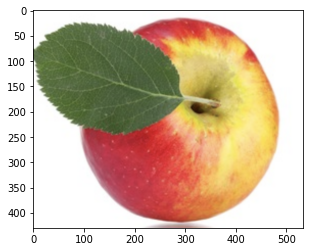

In [37]:
temp1 = make_predictions('fruits/test/freshapples/Screen Shot 2018-06-08 at 5.27.54 PM.png')
np.argmax(temp1)

1

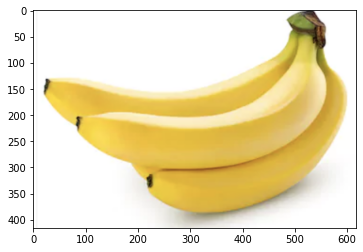

In [38]:
temp2 = make_predictions('fruits/test/freshbanana/Screen Shot 2018-06-12 at 9.54.43 PM.png')
np.argmax(temp2)

2

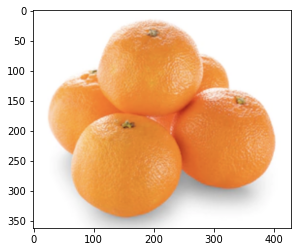

In [39]:
temp3 = make_predictions('fruits/test/freshoranges/Screen Shot 2018-06-13 at 12.08.17 AM.png')
np.argmax(temp3)

3

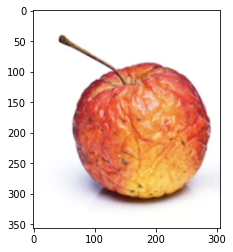

In [40]:
temp4 = make_predictions('fruits/test/rottenapples/Screen Shot 2018-06-07 at 2.18.25 PM.png')
np.argmax(temp4)

4

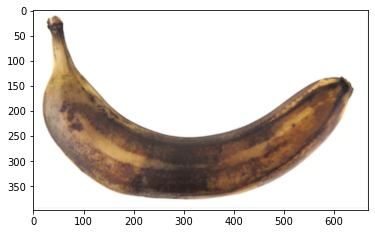

In [41]:
temp5 = make_predictions('fruits/test/rottenbanana/Screen Shot 2018-06-12 at 9.05.37 PM.png')
np.argmax(temp5)

5

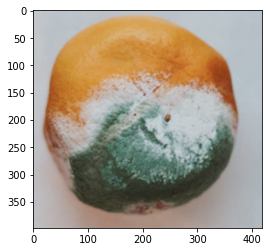

In [35]:
temp6 = make_predictions('fruits/test/rottenoranges/Screen Shot 2018-06-12 at 11.41.35 PM.png')
np.argmax(temp6)

In [43]:
def tasting_fruits(image_path):
    preds = make_predictions(image_path)
    if np.argmax(preds)>=4:
        print("It's ratten! Not yammy! Boo!")
    else:
        print("It's fresh! Yammy! Yes!")

It's fresh! Yammy! Yes!


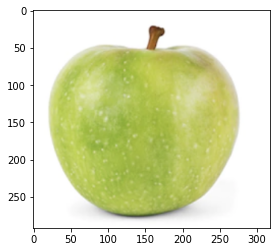

In [47]:
tasting_fruits('fruits/test/freshapples/Screen Shot 2018-06-08 at 5.13.25 PM.png')

<!--
## Run the Assessment
-->
## 達成度評価

<!--
To assess your model run the following two cells.

**NOTE:** `run_assessment` assumes your model is named `model` and your test data iterator is called `test_it`. If for any reason you have modified these variable names, please update the names of the arguments passed to `run_assessment`.
-->
達成度評価を受けるには、次の 2 つのセルを実行してください。

**注:** `run_assessment`は、モデルの名前が `model` であり、テストデータ イテレーターの名前が `test_it` であることを前提としています。何らかの理由でこれらの変数名を変更した場合は、`run_assessment` に渡す引数の名前を更新してください。

In [48]:
from run_assessment import run_assessment

In [49]:
run_assessment(model, test_it)

Evaluating model 5 times to obtain average accuracy...



/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


11/10 [================================] - 4s 383ms/step - loss: 0.6364 - categorical_accuracy: 0.9606

Accuracy required to pass the assessment is 0.92 or greater.
Your average accuracy is 0.9703.

Congratulations! You passed the assessment!
See instructions below to generate a certificate.


<!--
## Generate a Certificate
-->
## 修了証の発行

<!--
If you passed the assessment, please return to the course page (shown below) and click the "ASSESS TASK" button, which will generate your certificate for the course.
-->
達成度評価に合格したら、コースページに戻り、ASSESS TASK ボタンをクリックしてください。コース修了証が発行されます。

<img src="./images/assess_task.png" style="width: 800px;">